# Ice Cream prediction
Prediction with improved meodels and refactored code

In [4]:
#import libraries
import pandas as pd
import requests
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pandas as pd
import io
import requests
register_matplotlib_converters()
from datetime import datetime
import numpy as np
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from datetime import timedelta

In [5]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [6]:
#better way to do it 
url="https://raw.githubusercontent.com/ritvikmath/Time-Series-Analysis/master/ice_cream.csv" 
s=requests.get(url).content 
IC_prodiction=pd.read_csv(io.StringIO(s.decode('utf-8')), parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

In [8]:
IC_prodiction.rename('production', inplace=True)

DATE
1972-01-01     59.9622
1972-02-01     67.0605
1972-03-01     74.2350
1972-04-01     78.1120
1972-05-01     84.7636
                ...   
2019-09-01    100.1741
2019-10-01     90.1684
2019-11-01     79.7223
2019-12-01     75.7094
2020-01-01     83.6290
Name: production, Length: 577, dtype: float64

In [9]:
IC_prodiction = IC_prodiction.asfreq(pd.infer_freq(IC_prodiction.index))

In [10]:
# Only include dates from 2010 onward
start_date = pd.to_datetime('2010-01-01')
IC_prodiction = IC_prodiction[start_date:]

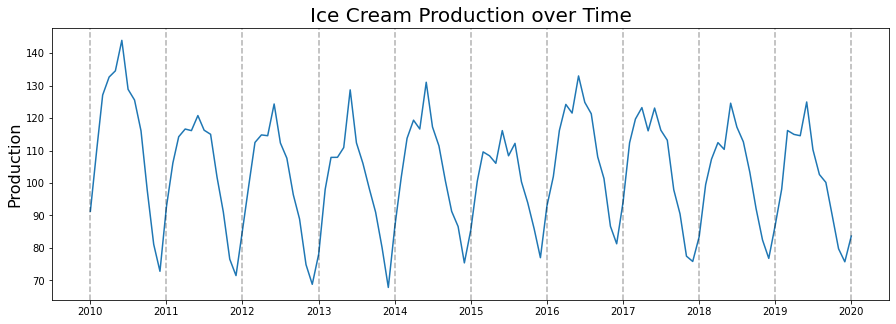

In [11]:
plt.figure(figsize=(15,5))
plt.plot(IC_prodiction)
plt.title('Ice Cream Production over Time',fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range(2010, 2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.3)

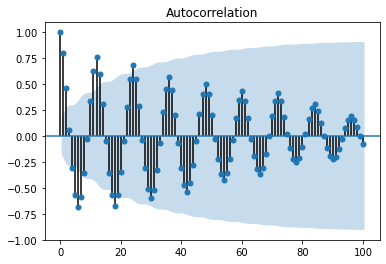

In [12]:
acf_plot = plot_acf(IC_prodiction, lags=100)

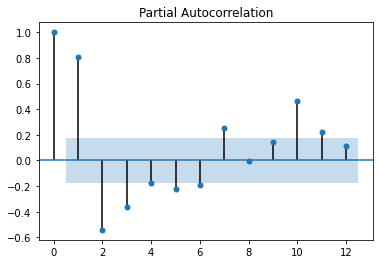

In [14]:
pacf_plot = plot_pacf(IC_prodiction, lags=12)

## Splitting data


In [15]:
train_end = datetime(2018,12,1)
test_end = datetime(2019,12,1)

train_data = IC_prodiction[:train_end]
test_data = IC_prodiction[train_end+timedelta(days=1):test_end] 
#timedalta allows us to to add the following time period

## Train Model

In [16]:
model = ARMA(train_data, order=(3,0))

In [17]:
model_fit = model.fit()

## Model description

As can be seen from the summary below, lags 1 and 3 are statistically significant

In [18]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             production   No. Observations:                  108
Model:                     ARMA(3, 0)   Log Likelihood                -374.085
Method:                       css-mle   S.D. of innovations              7.642
Date:                Tue, 26 Jan 2021   AIC                            758.170
Time:                        21:16:03   BIC                            771.580
Sample:                    01-01-2010   HQIC                           763.607
                         - 12-01-2018                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              103.5743      1.809     57.265      0.000     100.029     107.119
ar.L1.production     1.0469      0.088     11.960      0.000       0.875       1.218
ar.L2.production    -0.0523      0.134     -0.391      0.695      -0.314       0.210
ar.L3.production    -0.4044      0.089     -4.542      0.000      -0.579      -0.230
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9446           -0.5767j            1.1068           -0.0872
AR.2            0.9446           +0.5767j            1.1068            0.0872
AR.3           -2.0186           -0.0000j            2.0186           -0.5000
-----------------------------------------------------------------------------
"""

In [22]:
predictions = model_fit.predict(start=test_data.index[0], end=test_data.index[-1])

In [24]:
residuals = test_data - predictions

In [25]:
residuals

DATE
2019-01-01     5.762489
2019-02-01     7.970961
2019-03-01    14.648426
2019-04-01     3.806021
2019-05-01    -2.499486
2019-06-01     6.834535
2019-07-01    -4.770286
2019-08-01    -6.746904
2019-09-01    -2.967791
2019-10-01    -8.016210
2019-11-01   -15.893935
2019-12-01   -19.990281
Freq: MS, dtype: float64

Text(0, 0.5, 'Error')

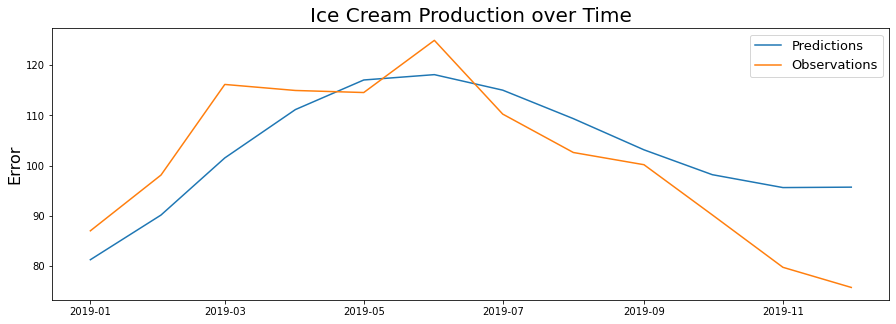

In [28]:
plt.figure(figsize=(15,5))
plt.plot(predictions, label='Predictions')
plt.plot(test_data, label='Observations')
plt.legend(fontsize=13)
plt.title('Ice Cream Production over Time', fontsize=20)
plt.ylabel('Error', fontsize=16)


Text(0, 0.5, 'Error')

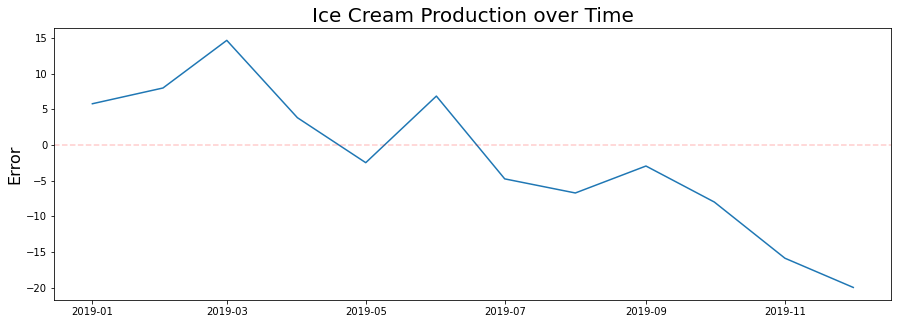

In [30]:
plt.figure(figsize=(15,5))
plt.plot(residuals)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)
plt.title('Ice Cream Production over Time', fontsize=20)
plt.ylabel('Error', fontsize=16)

In [34]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals/test_data)),4))
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Mean Absolute Percent Error: 0.0895
Root Mean Squared Error: 9.884057821002177
